# Naive forecast
## Note: Univariate forecast assuming that $x_{d,h} = x_{d-1,h}$
### *Where d=day and h=hour*

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.forecasting.model_selection import ExpandingWindowSplitter, ForecastingGridSearchCV
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sklearn.metrics import mean_absolute_error as MAE

In [28]:
data_naive_start = pd.read_csv('dfV3.csv')
data_naive_start["Unnamed: 0"] = pd.to_datetime(data_naive_start["Unnamed: 0"])
data_naive_start = data_naive_start.set_index('Unnamed: 0')


data_naive = pd.read_csv('dfV3.csv')['DK2']
# data_naive = data_naive_start.set_index(pd.DatetimeIndex(data_naive_start['Unnamed: 0']))['DK2']
data_naive_test = data_naive[-9341:]    # Test data consists of 20% og the entire data set
data_naive_train = data_naive[:-9341]   

data_naive_start

,cloud_cover,temp_soil_max_past1h,wind_max_per10min_past1h,acc_precip,bright_sunshine,mean_pressure,mean_radiation,mean_relative_hum,mean_temp,mean_wind_dir,...,DK2.L.40,DK2.L.41,DK2.L.42,DK2.L.43,DK2.L.44,DK2.L.45,DK2.L.46,DK2.L.47,DK2.L.48,trend
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2016-04-03 00:00:00,5.000000,6.8,8.1,0.0,0.0,1017.7,0.0,64.5,7.5,102.0,...,248.03,164.36,158.40,153.63,150.05,151.54,151.32,154.15,156.91,1
2016-04-03 01:00:00,41.666667,6.7,7.8,0.0,0.0,1017.3,0.0,74.3,6.1,104.7,...,294.07,248.03,164.36,158.40,153.63,150.05,151.54,151.32,154.15,2
2016-04-03 02:00:00,38.333333,6.6,7.4,0.0,0.0,1017.3,0.0,84.5,5.0,109.8,...,279.17,294.07,248.03,164.36,158.40,153.63,150.05,151.54,151.32,3
2016-04-03 03:00:00,36.666667,6.5,5.2,0.0,0.0,1016.7,0.0,86.5,4.8,95.5,...,251.38,279.17,294.07,248.03,164.36,158.40,153.63,150.05,151.54,4
2016-04-03 04:00:00,96.666667,6.5,5.2,0.0,0.0,1016.6,0.0,87.7,4.8,106.8,...,222.17,251.38,279.17,294.07,248.03,164.36,158.40,153.63,150.05,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31 20:00:00,37.500000,19.7,10.5,0.2,4.0,998.9,56.0,96.0,15.4,240.0,...,348.52,358.85,370.46,359.60,517.79,443.72,416.87,416.64,464.76,46701
2021-07-31 21:00:00,70.833333,19.6,12.0,0.0,33.5,999.3,45.0,95.0,15.6,242.0,...,343.68,348.52,358.85,370.46,359.60,517.79,443.72,416.87,416.64,46702
2021-07-31 22:00:00,72.500000,19.6,12.4,4.1,0.0,1000.1,2.0,96.2,15.2,233.0,...,346.95,343.68,348.52,358.85,370.46,359.60,517.79,443.72,416.87,46703


In [29]:
# fh = ForecastingHorizon(data_naive_test.index,is_relative=False)
forecaster = NaiveForecaster(strategy='last', sp=24)    # Seasonality trajectory at 24 since prices are folowing daily seasons
forecaster.fit(data_naive_train)
pred = forecaster.predict(list(range(1,9342)))   #list(range(1,10001))

g = pd.DataFrame([data_naive_test,pred]).T.set_index(data_naive_start[-9341:].index)

print('MAE from Naive Forecast: ', MAE(g['DK2'],g['Unnamed 0']))

MAE from Naive Forecast:  289.7682290699


In [30]:
g['Naive forecast'] = g['Unnamed 0']
g.drop('Unnamed 0', axis=1,inplace=True) 
# g = g.drop('Unnamed 0',axis=1)
# g["Unnamed: 0"] = pd.to_datetime(data_naive_start["Unnamed: 0"])
# g.set_index('Unnamed: 0')
g.reindex_like(data_naive_start[-6000:])
g

,DK2,Naive forecast
Unnamed: 0,,
2020-07-07 20:00:00,296.59,37.78
2020-07-07 21:00:00,297.04,36.29
2020-07-07 22:00:00,298.83,26.97
2020-07-07 23:00:00,299.20,11.25
2020-07-08 00:00:00,296.60,275.72
...,...,...
2021-07-31 20:00:00,487.41,37.78
2021-07-31 21:00:00,520.13,36.29
2021-07-31 22:00:00,514.70,26.97


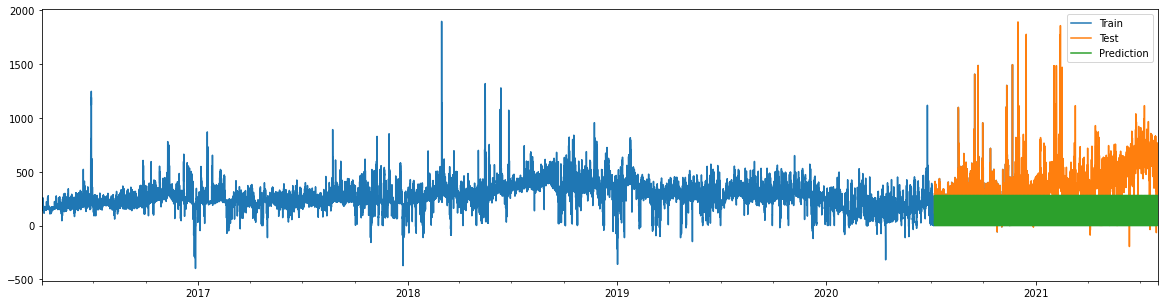

In [31]:
# Plot the actual values (train and test) and predicted valuesw
fig, ax = plt.subplots(figsize = (20,5))

data_naive_start.loc['2016-04-03 00:00:00':'2020-11-24 01:00:00']["DK2"].plot(ax=ax)   #Train data platted
g.loc[:'2021-08-01 00:00:00']["DK2"].plot(ax=ax)      # Test data plotted. Insert .loc[:'2020-06-01 23:00:00'] to make graph better

g.loc[:'2021-08-01 00:00:00']["Naive forecast"].plot(ax=ax,xlabel='')  #Forecasts plotted. Inster .loc[:'2020-06-01 23:00:00'] to make graph better

ax.legend(["Train","Test","Prediction"]);

plt.show()